In [11]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [12]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [13]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../CNN/input/seg_train/seg_train', '../CNN/input/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [14]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|          | 10/2191 [00:00<00:22, 95.29it/s]

Loading ../CNN/input/seg_train/seg_train


  3%|▎         | 13/437 [00:00<00:03, 121.25it/s]

Loading ../CNN/input/seg_test/seg_test


100%|██████████| 501/501 [00:04<00:00, 124.09it/s]


In [15]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [16]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


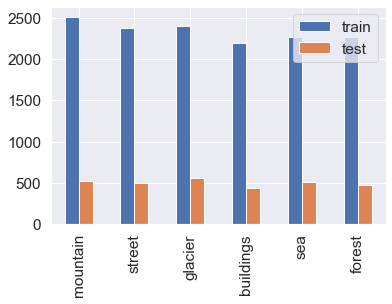

In [17]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

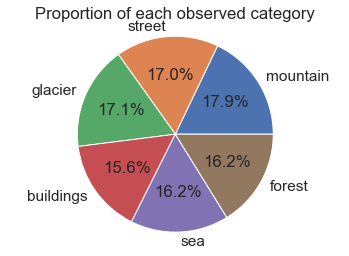

In [18]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [19]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [20]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

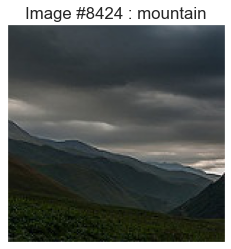

In [21]:
display_random_image(class_names, train_images, train_labels)

In [22]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

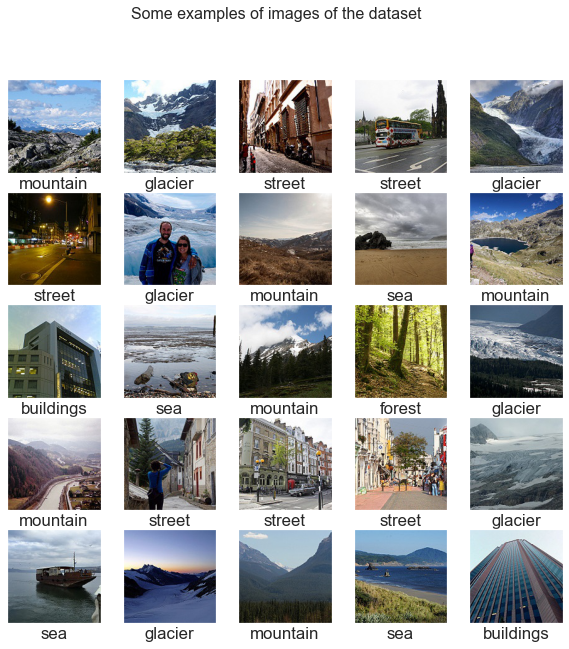

In [23]:
display_examples(class_names, train_images, train_labels)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [25]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 100s 1s/step - loss: 1.1201 - accuracy: 0.5723 - val_loss: 0.8610 - val_accuracy: 0.6641
Epoch 2/20
88/88 [==============================] - 101s 1s/step - loss: 0.7492 - accuracy: 0.7299 - val_loss: 0.7093 - val_accuracy: 0.7428
Epoch 3/20
88/88 [==============================] - 103s 1s/step - loss: 0.5694 - accuracy: 0.7985 - val_loss: 0.6420 - val_accuracy: 0.7748
Epoch 4/20
88/88 [==============================] - 105s 1s/step - loss: 0.4382 - accuracy: 0.8502 - val_loss: 0.6108 - val_accuracy: 0.7859
Epoch 5/20
88/88 [==============================] - 105s 1s/step - loss: 0.3144 - accuracy: 0.8950 - val_loss: 0.6368 - val_accuracy: 0.7820
Epoch 6/20
88/88 [==============================] - 103s 1s/step - loss: 0.2095 - accuracy: 0.9376 - val_loss: 0.7220 - val_accuracy: 0.7752
Epoch 7/20
88/88 [==============================] - 104s 1s/step - loss: 0.1529 - accuracy: 0.9547 - val_loss: 0.7837 - val_accuracy: 0.7667
Epoch 8/20
88

In [31]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [33]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 6s 68ms/step - loss: 1.2764 - accuracy: 0.7537


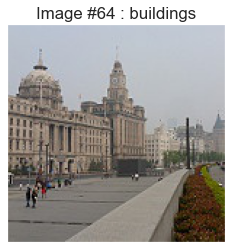

In [34]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [35]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

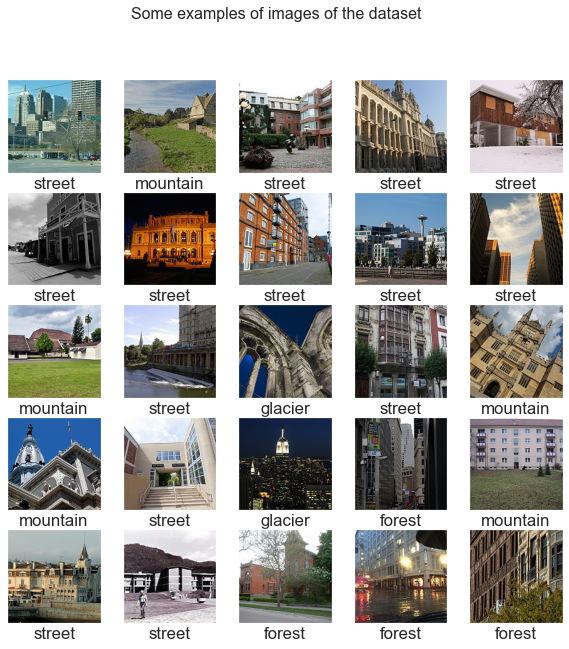

In [36]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

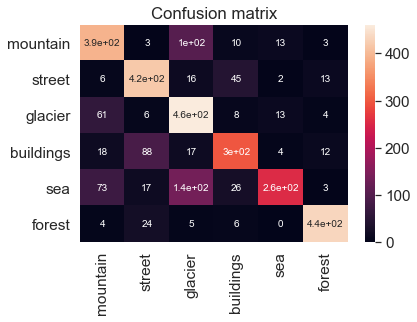

In [37]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [40]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [41]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [42]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [43]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

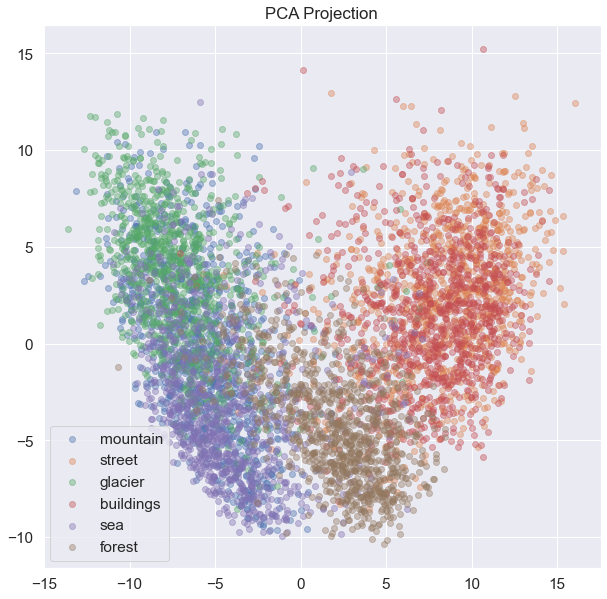

In [44]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [45]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
88/88 [==============================] - 1s 12ms/step - loss: 0.5217 - accuracy: 0.8115 - val_loss: 0.3732 - val_accuracy: 0.8571
Epoch 2/15
88/88 [==============================] - 1s 9ms/step - loss: 0.2996 - accuracy: 0.8929 - val_loss: 0.3253 - val_accuracy: 0.8817
Epoch 3/15
88/88 [==============================] - 1s 9ms/step - loss: 0.2309 - accuracy: 0.9194 - val_loss: 0.3234 - val_accuracy: 0.8799
Epoch 4/15
88/88 [==============================] - 1s 9ms/step - loss: 0.1878 - accuracy: 0.9355 - val_loss: 0.3332 - val_accuracy: 0.8810
Epoch 5/15
88/88 [==============================] - 1s 10ms/step - loss: 0.1485 - accuracy: 0.9526 - val_loss: 0.4070 - val_accuracy: 0.8682
Epoch 6/15
88/88 [==============================] - 1s 9ms/step - loss: 0.1308 - accuracy: 0.9585 - val_loss: 0.3342 - val_accuracy: 0.8803
Epoch 7/15
88/88 [==============================] - 1s 10ms/step - loss: 0.1018 - accuracy: 0.9681 - val_loss: 0.3504 - val_accuracy: 0.8842
Epoch 8/15
88/88 

KeyError: 'acc'

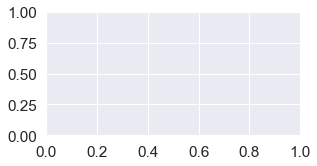

In [46]:
plot_accuracy_loss(history)

In [47]:
test_loss = model2.evaluate(test_features, test_labels)

94/94 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8800


In [48]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [49]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [50]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
79/79 [==============================] - 1s 14ms/step - loss: 0.5145 - accuracy: 0.8043 - val_loss: 0.2940 - val_accuracy: 0.9029
Epoch 2/10
79/79 [==============================] - 1s 11ms/step - loss: 0.2487 - accuracy: 0.9139 - val_loss: 0.2513 - val_accuracy: 0.9199
Epoch 3/10
79/79 [==============================] - 1s 11ms/step - loss: 0.1886 - accuracy: 0.9372 - val_loss: 0.2275 - val_accuracy: 0.9172
Epoch 4/10
79/79 [==============================] - 1s 10ms/step - loss: 0.1385 - accuracy: 0.9568 - val_loss: 0.2090 - val_accuracy: 0.9332
Epoch 5/10
79/79 [==============================] - 1s 11ms/step - loss: 0.1060 - accuracy: 0.9690 - val_loss: 0.1950 - val_accuracy: 0.9359
Epoch 6/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0781 - accuracy: 0.9803 - val_loss: 0.2222 - val_accuracy: 0.9092
Epoch 7/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0665 - accuracy: 0.9841 - val_loss: 0.1845 - val_accuracy: 0.9457
Epoch 8/10
79

In [51]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [52]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8866666666666667


In [53]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [54]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [55]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [56]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
new_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 9, 9, 512)]       0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

In [58]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
88/88 [==============================] - 308s 4s/step - loss: 0.6158 - accuracy: 0.7738 - val_loss: 0.3463 - val_accuracy: 0.8814
Epoch 2/10
88/88 [==============================] - 311s 4s/step - loss: 0.3012 - accuracy: 0.8985 - val_loss: 0.2996 - val_accuracy: 0.9024
Epoch 3/10
88/88 [==============================] - 317s 4s/step - loss: 0.2485 - accuracy: 0.9128 - val_loss: 0.2748 - val_accuracy: 0.9116
Epoch 4/10
88/88 [==============================] - 292s 3s/step - loss: 0.1974 - accuracy: 0.9303 - val_loss: 0.3286 - val_accuracy: 0.8899
Epoch 5/10
88/88 [==============================] - 234s 3s/step - loss: 0.1753 - accuracy: 0.9409 - val_loss: 0.3700 - val_accuracy: 0.8817
Epoch 6/10
88/88 [==============================] - 235s 3s/step - loss: 0.1378 - accuracy: 0.9530 - val_loss: 0.3193 - val_accuracy: 0.9038
Epoch 7/10
88/88 [==============================] - 228s 3s/step - loss: 0.1070 - accuracy: 0.9632 - val_loss: 0.3764 - val_accuracy: 0.9027
Epoch 8/10
88

In [60]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.9043333333333333
